In [18]:
from helpers import *
from canonical_order_kant import *
from graph_checks import *
from boundary_cycle import *

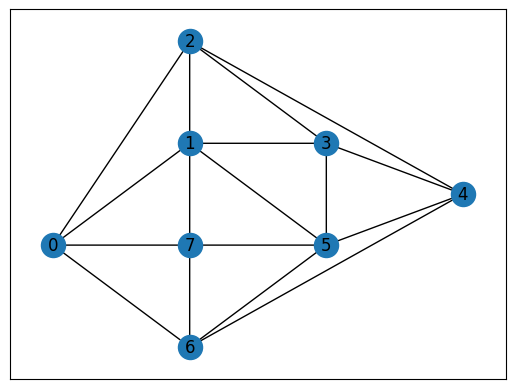

In [2]:
G, embed = simple_four_con_graph()
plot_planar(G, old_pos=embed)

In [3]:
_ = check_graph(G)

In [4]:
corner_nodes = [CornerNode(index=0, name=CardinalDirections.WEST), 
 CornerNode(index=2, name=CardinalDirections.NORTH), 
 CornerNode(index=4, name=CardinalDirections.EAST), 
 CornerNode(index=6, name=CardinalDirections.SOUTH), ]
corner_node_dict = {k: v for k, v in zip(list(range(4)), corner_nodes)}
data = GraphData(G, embed, corner_node_dict)
data

GraphData{'G': <networkx.classes.graph.Graph object at 0x123792160>, 'embed': {0: array([-3,  0]), 1: array([0, 4]), 2: array([0, 8]), 3: array([3, 4]), 4: array([6, 2]), 5: array([3, 0]), 6: array([ 0, -4]), 7: array([0, 0])}, 'corner_node_dict': {0: CornerNode({'neighbour_indices': None, 'name': <CardinalDirections.WEST: 1>, 'index': 0, 'location': None, 'mean_location': None}), 1: CornerNode({'neighbour_indices': None, 'name': <CardinalDirections.NORTH: 2>, 'index': 2, 'location': None, 'mean_location': None}), 2: CornerNode({'neighbour_indices': None, 'name': <CardinalDirections.EAST: 3>, 'index': 4, 'location': None, 'mean_location': None}), 3: CornerNode({'neighbour_indices': None, 'name': <CardinalDirections.SOUTH: 0>, 'index': 6, 'location': None, 'mean_location': None})}, 'rel': None, 'boundary': None})

In [5]:
# get_index_by_cardinal_direction(CardinalDirections(0), k.corner_node_dict)

In [6]:
k = KantCanonicalOrder(copy.deepcopy(data))
k.initialize_all_nodes()
k.update_starting_nodes()

ic| CardinalDirections(number): <CardinalDirections.SOUTH: 0>
ic| node_index: 6
ic| CardinalDirections(number): <CardinalDirections.WEST: 1>
ic| node_index: 0


In [7]:
show_graph_attributes(k.G)

("Node 0: {'data': NodeCanonicalOrder({'index': 0, 'order': 2, 'mark': False, "
 "'visited': 0, 'chords': 0})}")
("Node 1: {'data': NodeCanonicalOrder({'index': 1, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 2: {'data': NodeCanonicalOrder({'index': 2, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 3: {'data': NodeCanonicalOrder({'index': 3, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 4: {'data': NodeCanonicalOrder({'index': 4, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 5: {'data': NodeCanonicalOrder({'index': 5, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 6: {'data': NodeCanonicalOrder({'index': 6, 'order': 1, 'mark': False, "
 "'visited': 0, 'chords': 0})}")
("Node 7: {'data': NodeCanonicalOrder({'index': 7, 'order': -99, 'mark': "
 "False, 'visited': 2, 'chords': 0})}")


In [9]:
def get_node_data(node_index):
    data:NodeCanonicalOrder = k.G.nodes[node_index]["data"]
    return data

In [10]:
# pick a vertex 
def check_vertex_criteria(node_index):
    data = get_node_data(node_index)
    if data.mark == False:
        if data.visited >= 2:
            if data.chords == 0:
                if data.order != 1 and data.order != 2:
                    return True

In [11]:
def update_neighbors(node_index):
    nbs = [nb for nb in k.G.neighbors(node_index)]
    ic(nbs)
    for nb in nbs:
        data = get_node_data(nb)
        data.update_visited()
        # todo update chords info 

In [12]:
#TODO: for loop 
for node_index in k.G.nodes:
    if check_vertex_criteria(node_index):
        ic(node_index)
        data = get_node_data(node_index)
        data.add_node_to_order(k.vn)
        
        update_neighbors(node_index)

    # else:
    #     ic(f"{node_index} didnt meet criteria")

ic| node_index: 7
ic| nbs: [6, 0, 1, 5]


In [15]:
# # chords .. 
# # (1) find the subgraph induced by V - {u in V where Mark(u) is true}

# find such u 
marked_nodes = []
for node_index in k.G.nodes:
    data = get_node_data(node_index)
    if data.mark == True:
        marked_nodes.append(node_index)

# get the subgraph 
unmarked_nodes = set(k.G.nodes).difference(set(marked_nodes))
G_diff = nx.subgraph(k.G, unmarked_nodes)



# get the external face of the subgraph 

In [16]:
G_diff.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

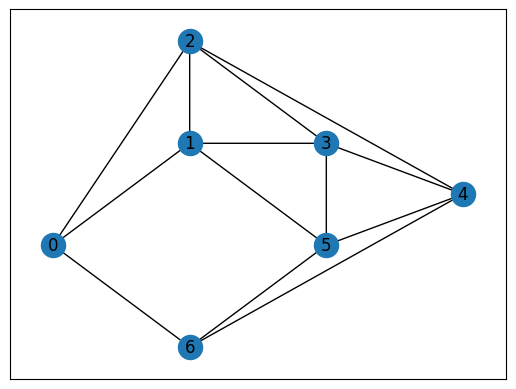

In [17]:
plot_planar(G_diff, k.embed) 
# now need external face.. 

In [19]:
temp_graph_data  = GraphData(G_diff, k.embed)
b = BoundaryCycle(temp_graph_data) #TODO why is None being returned ?
b.ccw_boundary_cycle

[5, 6, 4, 2, 0, 1]